In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Составлена матрица растояний между административными центрами областей ЮФО по дорогам.

In [ ]:
matrix = pd.read_excel('/content/юфо.xlsx', sheet_name='расстояния', index_col=0)
matrix

,Республика Адыгея,Республика Калмыкия,Республика Крым,Краснодарский край,Астраханская область,Волгоградская область,Ростовская область,Город федерального значения Севастополь
Республика Адыгея,0,480,570,132,800,720,330,660
Республика Калмыкия,480,0,970,510,310,293,450,1060
Республика Крым,570,970,0,460,1290,1180,710,970
Краснодарский край,132,510,460,0,820,750,282,530
Астраханская область,800,310,1290,820,0,420,770,1370
Волгоградская область,720,293,1180,750,420,0,480,1270
Ростовская область,330,450,710,282,770,480,0,800
Город федерального значения Севастополь,660,1060,970,530,1370,1270,800,0


Проведем стандартизацию расстояний по строкам матрицы

In [ ]:
def standardize(row):
      zero_loc = np.argmin(row.values)
      list_ = np.delete(row.values, zero_loc)
      standartized_row = (list_ - list_.mean())/list_.std()
      return np.insert(standartized_row, zero_loc, 0)

matrix_standartized = matrix.apply(standardize)

Преобразование матрицы стандартизированных расстояний в относительную матрицу vij = 1/xij

In [ ]:
def relative_matrix(row):
      zero_loc = np.argmin(np.abs(row.values))
      list_ = np.delete(row.values, zero_loc)
      relative_row = 1 / list_
      return np.insert(relative_row, zero_loc, 0)

matrix_standartized_relative = matrix_standartized.apply(relative_matrix)

Формируем матрицу стандартизированных расстояний wij = vij/sum(vij)

In [ ]:
def stand_distances(row, sum_):
      zero_loc = np.argmin(np.abs(row.values))
      list_ = np.delete(row.values, zero_loc)
      sd_row = list_ / sum_
      return np.insert(sd_row, zero_loc, 0)

sum_ = np.sum(matrix_standartized_relative.values)
SDM = matrix_standartized_relative.apply(stand_distances, args=[sum_])

In [ ]:
SDM

,Республика Адыгея,Республика Калмыкия,Республика Крым,Краснодарский край,Астраханская область,Волгоградская область,Ростовская область,Город федерального значения Севастополь
Республика Адыгея,0.000000,0.037825,0.012553,0.008263,0.193116,0.449776,0.012315,0.013275
Республика Калмыкия,0.061679,0.000000,-0.042366,-0.245978,0.009629,0.010723,0.027710,-0.035633
Республика Крым,-0.068717,-0.009926,0.000000,0.080129,-0.010696,-0.010433,-0.016220,-0.208317
Краснодарский край,0.007398,0.053617,0.009254,0.000000,0.869020,-0.239662,0.010076,0.009180
Астраханская область,-0.010732,0.014172,-0.009415,-0.009377,0.000000,0.015110,-0.011876,-0.009243
Волгоградская область,-0.015191,0.013338,-0.012850,-0.011979,0.012240,0.000000,0.040305,-0.012144
Ростовская область,0.014817,0.029219,0.022978,0.014009,0.089130,0.018730,0.000000,0.025548
Город федерального значения Севастополь,-0.022066,-0.008058,-0.042366,-0.093602,-0.009124,-0.008693,-0.010473,0.000000


Рассмотрим данные о средней заработной плате педагогических работников в январе-декабре 2023 года в каждой из областей (данные с Росстата).

In [ ]:
salary = pd.read_excel('/content/юфо.xlsx', sheet_name='зп', index_col=0)
salary

,"средняя зп, руб"
Регион,
Республика Адыгея,38341.8
Республика Калмыкия,35090.4
Республика Крым,35161.9
Краснодарский край,44586.4
Астраханская область,39230.7
Волгоградская область,37073.4
Ростовская область,40950.5
г. Севастополь,49604.0


**Рассчитаем индекс Морана**

In [ ]:
def Morana_Index(W, X):
      n = W.shape[0]
      X_mean = X.mean()
      X_i = np.repeat(X, n).values.reshape(n, n).T
      X_j = X_i.T

      I = (n / np.sum(W.values)) * np.sum(W.values * (X_i - X_mean) * (X_j - X_mean)) / np.sum((X_i - X_mean)**2)
      return I

IG1 = Morana_Index(SDM, salary['средняя зп, руб'])
print(f'Индекс Морана : {IG1:.4f}')

Индекс Морана : 0.0845


In [ ]:
# Ожидаемое значение индекса Морана
N = len(salary)
E = -(1/(N-1))
E

-0.14285714285714285

IG > E наблюдается положительная пространственная автокорреляция (значения в соседних территориях являются подобными). Тенденция к тому, что регионы с высокими зарплатами окружены регионами, где зарплаты высокие (где низкие, низкими и т д).

Получим z-статистику, чтобы проверить гипотезу о случайности пространственного распределения регионов

In [ ]:
x = salary['средняя зп, руб']
z = (x - x.mean())/x.std()
print(z)

Регион
Республика Адыгея       -0.333963
Республика Калмыкия     -0.986873
Республика Крым         -0.972515
Краснодарский край       0.920009
Астраханская область    -0.155464
Волгоградская область   -0.588669
Ростовская область       0.189887
г. Севастополь           1.927587
Name: средняя зп, руб, dtype: float64


**Индекс Гетиса-Орда**

In [ ]:
def Getisa_Index(W, X):
      n = W.shape[0]
      X_mean = X.mean()
      X_i = np.repeat(X, n).values.reshape(n, n).T
      X_j = X_i.T

      G = (np.sum(W.values*X_i*X_j)) / np.sum((X_i*X_j))
      E = (np.sum(W.values))/(n*(n-1))
      return G, E

GE = Getisa_Index(SDM, salary['средняя зп, руб'])
print(f'Индекс Гетиса-Орда : {GE[0]:.4f}')
print(f'Ожидаемое среднее значение автокорреляции : {GE[1]:.4f}')

Индекс Гетиса-Орда : 0.0148
Ожидаемое среднее значение автокорреляции : 0.0179


G < E наблюдается пространственная кластеризация объектов с низкими значениями.

**Статистика Джири**

In [ ]:
def Giri(W, X):
      n = W.shape[0]
      X_mean = X.mean()
      X_i = np.repeat(X, n).values.reshape(n, n).T
      X_j = X_i.T
      C = (n-1) * np.sum(W.values * (X_i - X_j)**2) / (2*np.sum(W.values)*np.sum((X_i - X_mean)**2))
      return C

C = Giri(SDM, salary['средняя зп, руб'])
print(f'Статистика Джири : {C:.4f}')

Статистика Джири : -0.1559


Нет очевидной пространственной зависимости.

Рассмотрим численность постоянного населения в среднем за 2023 года в каждой из областей (данные с Росстата).

In [ ]:
size = pd.read_excel('/content/юфо.xlsx', sheet_name='численность', index_col=0)
size

,численность населения
Регион,
Республика Адыгея,499287
Республика Калмыкия,265627
Республика Крым,1913152
Краснодарский край,5826173
Астраханская область,948492
Волгоградская область,2461978
Ростовская область,4158532
Город федерального значения Севастополь,559824


**Индекс Морана**

In [ ]:
IG2 = Morana_Index(SDM, size['численность населения'])
print(f'Индекс Морана : {IG2:.4f}')

Индекс Морана : -0.0915


In [ ]:
# Ожидаемое значение индекса Морана
N = len(size)
E = -(1/(N-1))
E

-0.14285714285714285

IG > E наблюдается положительная пространственная автокорреляция (значения в соседних территориях являются подобными).Тенденция к тому, что регионы с высокой численностью окружены регионами, где высокая численность (и т д).

Получим z-статистику, чтобы проверить гипотезу о случайности пространственного распределения регионов



In [ ]:
x = size['численность населения']
z = (x - x.mean())/x.std()
print(z)

Регион
Республика Адыгея                         -0.791200
Республика Калмыкия                       -0.908219
Республика Крым                           -0.083125
Краснодарский край                         1.876548
Астраханская область                      -0.566234
Волгоградская область                      0.191732
Ростовская область                         1.041380
Город федерального значения Севастополь   -0.760883
Name: численность населения, dtype: float64


**Индекс Гетиса-Орда**

In [ ]:
GE = Getisa_Index(SDM, size['численность населения'])
print(f'Индекс Гетиса-Орда : {GE[0]:.4f}')
print(f'Ожидаемое среднее значение автокорреляции : {GE[1]:.4f}')

Индекс Гетиса-Орда : 0.0126
Ожидаемое среднее значение автокорреляции : 0.0179


G < E наблюдается пространственная кластеризация объектов с низкими значениями.

**Статистика Джири**

In [ ]:
C = Giri(SDM, size['численность населения'])
print(f'Статистика Джири : {C:.4f}')

Статистика Джири : 0.2305


Возрастающая положительная пространственная автокорреляция.

**Провести пространственную кластеризацию с помощью диаграммы рассеивания Морана.**

In [ ]:
def quadrant(z, Wz):
    if (z > 0) & (Wz > 0):
        return 'HH'
    if (z < 0) & (Wz > 0):
        return 'LH'
    if (z > 0) & (Wz < 0):
        return 'Hl'
    if (z < 0) & (Wz < 0):
        return 'LL'

from scipy.stats import zscore
def Morans_scatterplot(data, IG):
    plt.figure(figsize=(12, 8))
    ax = plt.gca()
    ax.spines['left'].set_position( ('data', 0))
    ax.spines['bottom'].set_position( ('data', 0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    z = zscore(data, ddof=1)
    Wz = SDM.mean(1)

    x_IG = np.linspace(z.min(), z.max() , 50)
    y_IG = IG * x_IG
    x_IG = x_IG[np.where((y_IG > Wz.min()) & (y_IG < Wz.max()))]
    y_IG = y_IG[np.where((y_IG > Wz.min()) & (y_IG < Wz.max()))]
    plt.plot(x_IG, y_IG, lw=.8, color='black', ls='--', zorder=1)

    plt.scatter(z, Wz, color='black', edgecolors='orange', zorder=3)
    for i, index in enumerate(SDM.index.tolist()):
        t = plt.annotate(index, (z[1], Wz[i]), xytext=(z[i], Wz[i] + 0.008), fontsize=12, ha='center', zorder=2)
        t.set_bbox(dict(facecolor='orange', alpha=0.4, edgecolor='black', boxstyle='round'))

    plt.text(0.08, Wz.max()+0.01, 'Wz', ha='center', fontsize=14)
    plt.text(z.max()+0.2, -0.005, 'z', ha='center', fontsize=14)

    results = pd.DataFrame(data).reset_index(names='Регион')
    results['Квадрант'] = list(map(lambda i: quadrant(z.values[i], Wz.values[i]), np.arange(data.shape[0])))
    return results.set_index(['Квадрант', 'Регион']).sort_index(ascending=False)

Диаграмма рассеяния Морана для данных по зарплатам педагогических работников


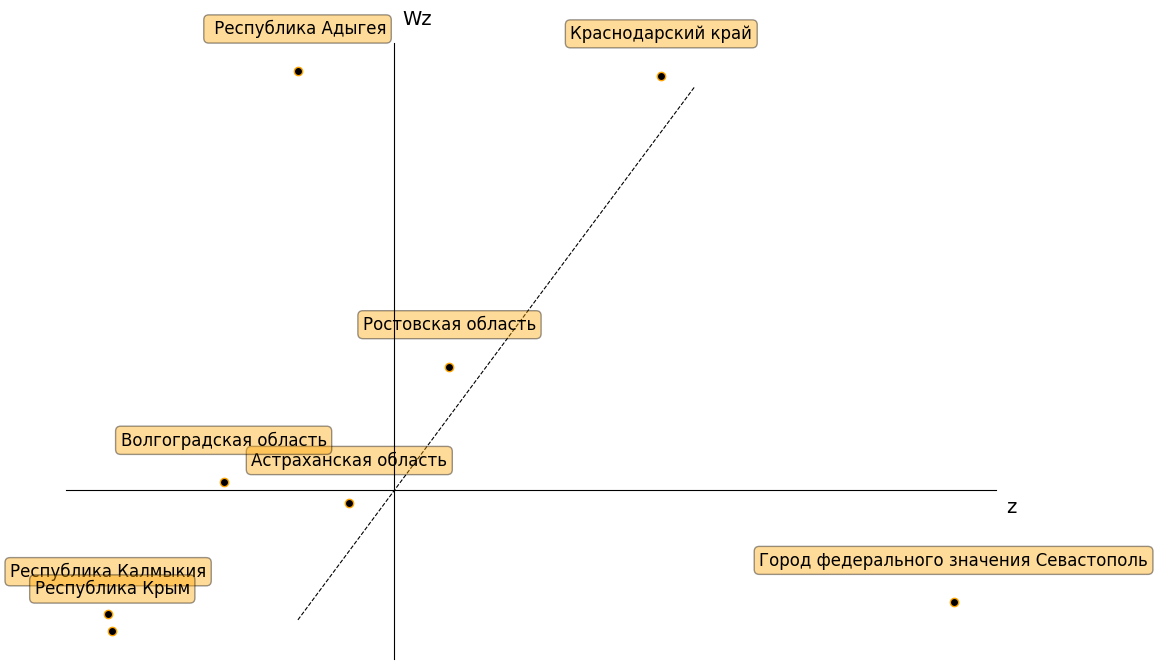

In [ ]:
print('Диаграмма рассеяния Морана для данных по зарплатам педагогических работников')
results = Morans_scatterplot(salary['средняя зп, руб'], IG1)

1. ядра: Севастополь. В этом городе наблюдается отрицательная автокорреляция: у педагогов относительно высокие средние зарплаты, окружен регионами с относительно низкими зарплатами.
2. спутники-противовесы: Краснодарский край, Ростовская область. В этих регионах наблюдается положительная автокорреляция: у педагогов относительно высокие средние зарплаты в данных регионах, окружены регионы территориями с относительно высокими зарплатами.
3. периферия: республика Адыгея, Волгоградская область. В этих регионах наблюдается отрицательная автокорреляция: у педагогов относительно низкие средние зарплаты в данных регионах, окружены регионы территориями с относительно высокими зарплатами.
4. территории, не испытывающие влияние ни ядер, ни спутнико-противовесов: Астраханская область, республика Калмыкия и Крым. В этих регионах наблодается положительная автокорреляция: у педагогов относительно низкие средние зарплаты в данных регионах, которые окружены регионами также с относительно низкими зарплатами.


Диаграмма рассеяния Морана для данных по численность постоянного населения


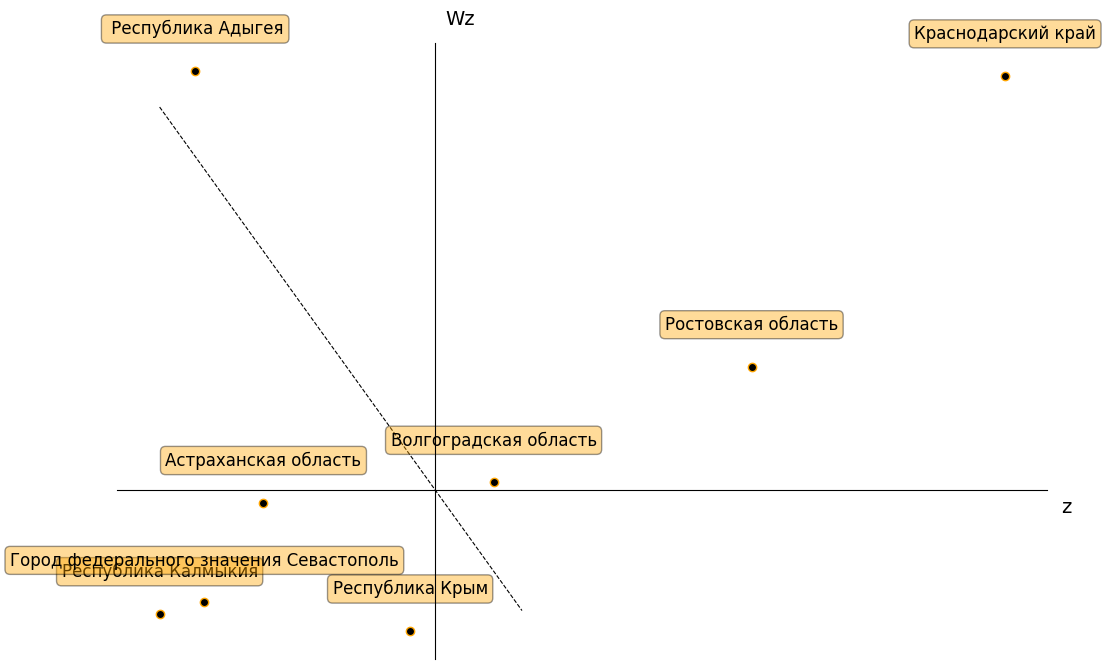

In [ ]:
print('Диаграмма рассеяния Морана для данных по численность постоянного населения')
results = Morans_scatterplot(size['численность населения'], IG2)

1. ядра: таких городов нет.
2. спутники-противовесы: Краснодарский край, Ростовская и Волгоградская область. В этих регионах наблюдается положительная автокорреляция: регионы с относительно высокой численностью постоянного населения, окружены территориями с относительно высокой численностью постоянного населения.
3. периферия: республика Адыгея. В этих регионах наблюдается отрицательная автокорреляция: регионы с относительно низкой численностью, окружены регионы территориями с относительно высокой численностью.
4. территории, не испытывающие влияние ни ядер, ни спутнико-противовесов: Астраханская область, республика Калмыкия и Крым, Севастополь. В этих регионах наблодается положительная автокорреляция: численность постоянного населения относительно низкая, окружены регионами также с относительно низкой численностью.

**Провести всесторонний анализ и выработать рекомендации.**

Пространственный анализ данных средней заработной платы педагогических работников показал наличие значимой пространственной автокорреляции и кластеризации. Высокие и низкие зарплаты имеют тенденцию сосредотачиваться в определенных регионах, образуя четкие кластеры. Несмотря на это, статистика Джири показала, что нет линейной зависимости между значениями зарплат и их пространственным распределением.

Такое распределение указывает на возможное влияние региональных факторов и экономических условий на заработные платы педагогических работников. Для более глубокого понимания причин пространственной автокорреляции и кластеризации может потребоваться дальнейшее исследование с учетом социально-экономических и демографических характеристик регионов.








Пространственный анализ данных численности постоянного населения выявил значительную пространственную автокорреляцию и кластеризацию. Высокая и низкая численность населения имеют тенденцию сосредотачиваться в определенных регионах, образуя четкие кластеры. Это может указывать на влияние различных социально-экономических и географических факторов, таких как доступность ресурсов, инфраструктуры и экономические условия, на численность населения.

Отсутствие регионов, играющих роль ядер, указывает на равномерное распределение крупных и малых населенных пунктов без явно выделяющихся центров.